### Setup and Imports
This cell imports all the necessary libraries for data generation, model building, training, and evaluation, including `os`, `cv2`, `numpy`, `pandas`, `matplotlib`, `csv`, and `tensorflow`/`keras`.

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
import tensorflow as tf
import keras
from keras import layers, models

### Dataset Generation
This section defines parameters for the dataset (image size, number of samples, folder names) and then generates a synthetic dataset. Each image contains a single white pixel, and its (row, col) coordinates are stored in a CSV file. The dataset generation is skipped if the files already exist.

In [4]:
IMAGE_SIZE = 50
NUM_SAMPLES = 10000
IMAGE_FOLDER = "images"
LABEL_FILE = "labels.csv"

# ===================== DATASET GENERATION =====================
# Check if the label file exists AND the folder has the expected number of images
if os.path.exists(LABEL_FILE) and os.path.isdir(IMAGE_FOLDER) and len(os.listdir(IMAGE_FOLDER)) >= NUM_SAMPLES:
    print(f"Dataset already exists with {NUM_SAMPLES} samples. Skipping generation.")
else:
    print("Generating dataset...")
    os.makedirs(IMAGE_FOLDER, exist_ok=True)

    with open(LABEL_FILE, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["filename", "row", "col"])

        for i in range(NUM_SAMPLES):
            img = np.zeros((IMAGE_SIZE, IMAGE_SIZE), dtype=np.uint8)

            row = np.random.randint(0, IMAGE_SIZE)
            col = np.random.randint(0, IMAGE_SIZE)

            img[row, col] = 255

            filename = f"img_{i}.png"
            cv2.imwrite(os.path.join(IMAGE_FOLDER, filename), img)

            writer.writerow([
                filename,
                row / IMAGE_SIZE,
                col / IMAGE_SIZE
            ])

    print("Dataset generated successfully.")

Generating dataset...
Dataset generated successfully.


### Data Loading, Model Definition, and Training
This cell loads the generated image and label data, preprocesses it (normalization, reshaping), and splits it into training and validation sets. It then defines a Convolutional Neural Network (CNN) model suitable for regression, compiles it with the Adam optimizer and Mean Squared Error (MSE) loss, trains the model for 20 epochs, and plots the training and validation loss. Finally, the trained model is saved.

Loading data into memory...
Training data shape: (8000, 50, 50, 1)
Validation data shape: (2000, 50, 50, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

Starting training...
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - loss: 0.0525 - mae: 0.1410 - val_loss: 0.0021 - val_mae: 0.0312
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - loss: 0.0013 - mae: 0.0239 - val_loss: 6.4307e-04 - val_mae: 0.0173
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 5.8372e-04 - mae: 0.0175 - val_loss: 5.9667e-04 - val_mae: 0.0185
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 3.4539e-04 - mae: 0.0139 - val_loss: 2.7213e-04 - val_mae: 0.0122
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 2.3105e-04 - mae: 0.0114 - val_loss: 2.8962e-04 - val_mae: 0.0136
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 1.7705e-04 - mae: 0.0102 - val_loss: 1.9117e-04 - val_mae: 0.0102
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 1.7878e-04 - mae: 0.0100 - val_loss: 8.7137e-05 - val_mae: 0.0071
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 9.1788e-05 - mae: 0.0073 - val_lo

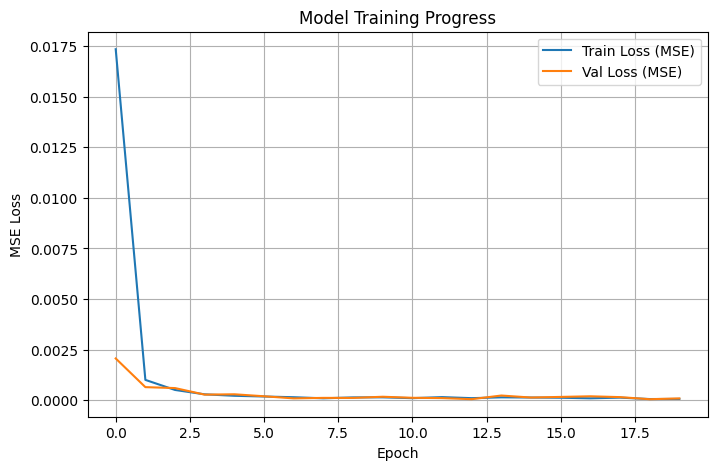

Model successfully saved to pixel_regression_model.keras!


In [5]:

print("Loading data into memory...")
labels = pd.read_csv(LABEL_FILE)

X, Y = [], []

for _, r in labels.iterrows():
    img_path = os.path.join(IMAGE_FOLDER, r["filename"])
    # Read as grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Rationale: Normalize pixel values to [0, 1] to help the neural network converge faster
    img = img / 255.0

    # Rationale: Reshape to include the channel dimension (H, W, 1) required by Conv2D layers
    img = img.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

    X.append(img)
    Y.append([r["row"], r["col"]])

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

# Rationale: Split into 80% training and 20% validation to monitor for overfitting
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# ===================== MODEL ARCHITECTURE =====================
# Rationale: A Convolutional Neural Network (CNN) is used because it excels at
# learning spatial hierarchies and detecting features (like our single white pixel) in images.
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    # Rationale: Linear activation with 2 output nodes for (x, y) continuous coordinate regression
    layers.Dense(2, activation="linear")
])

# Rationale: Mean Squared Error (MSE) is the standard loss function for regression tasks
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

model.summary()

# ===================== TRAIN =====================
print("Starting training...")
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    epochs=20, # Ensure EPOCHS is defined in your config cell (e.g., EPOCHS = 20)
    batch_size=32 # Ensure BATCH_SIZE is defined in your config cell (e.g., BATCH_SIZE = 32)
)

# ===================== LOSS PLOT =====================
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train Loss (MSE)")
plt.plot(history.history["val_loss"], label="Val Loss (MSE)")
plt.title("Model Training Progress")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

# ===================== SAVE MODEL =====================
# Saved locally to the current directory for portability
save_path = "pixel_regression_model.keras"
model.save(save_path)
print(f"Model successfully saved to {save_path}!")

### Model Evaluation and Visualization
This section loads the previously trained model and the dataset. It then performs predictions on the entire dataset, converts normalized coordinates back to pixel values, and calculates various metrics like mean, std, and max pixel errors. Visualizations include predicted vs. actual coordinates plot, error distribution histogram, and a visual sample check comparing ground truth and predicted pixel locations. Finally, it calculates and plots regression accuracy at different pixel tolerances.

Loading trained model...
Model loaded successfully.
Loading dataset...
Dataset loaded: (10000, 50, 50, 1) (10000, 2)
Running inference on dataset...
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step

📊 VALIDATION METRICS
Mean pixel error : 0.5421653
Std pixel error  : 0.35053822
Max pixel error  : 2.6223183


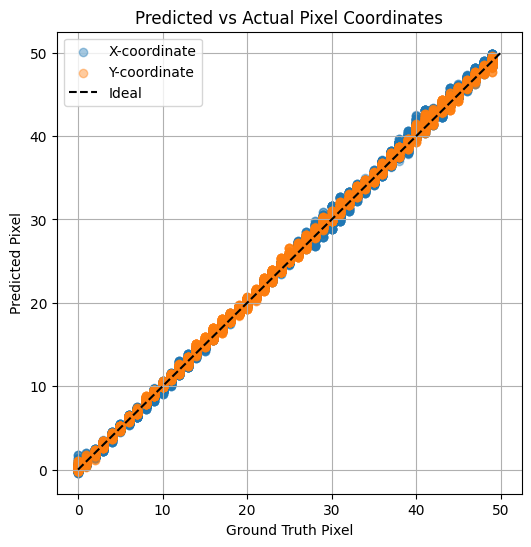

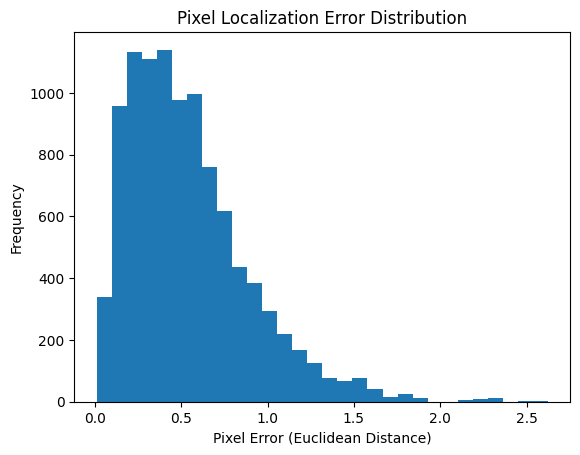

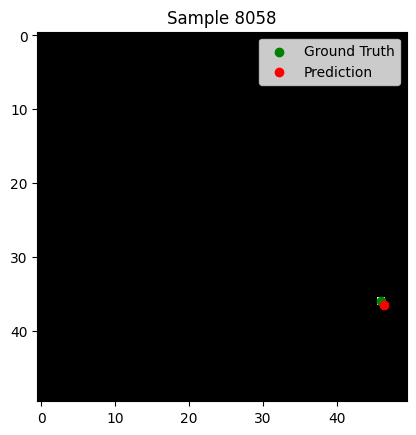

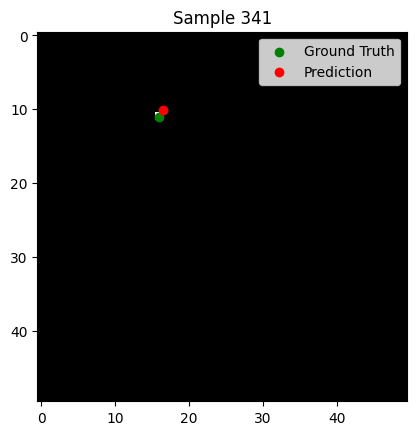

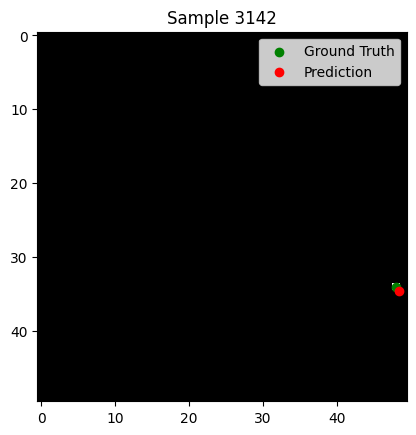

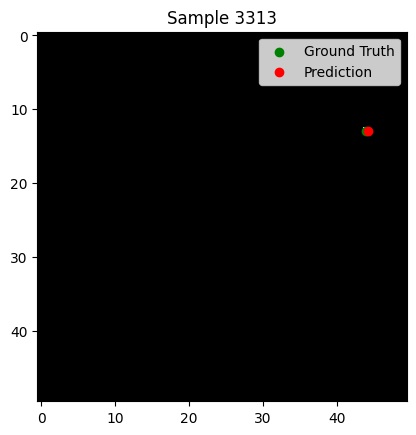

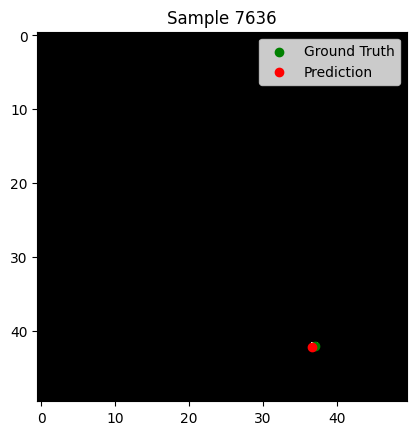


🎯 REGRESSION ACCURACY
Accuracy within 1 pixel : 89.86%
Accuracy within 2 pixels: 99.68%
Accuracy within 3 pixels: 100.00%


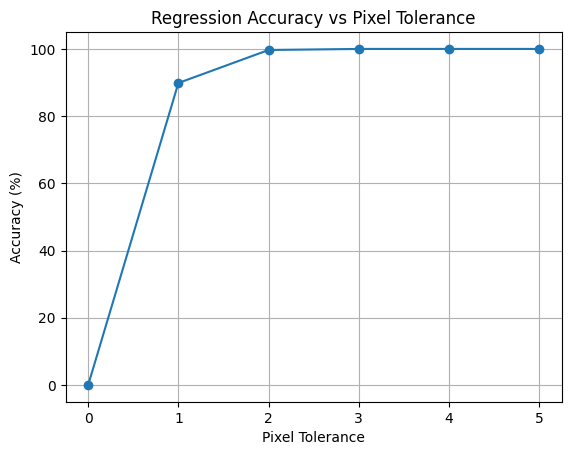

In [7]:
# ===================== CONFIG =====================
IMAGE_SIZE = 50
IMAGE_FOLDER = "images"
LABEL_FILE = "labels.csv"

# 👉 CHANGE THIS TO YOUR MODEL PATH
MODEL_PATH = r"pixel_regression_model.keras"

# ===================== LOAD MODEL =====================
print("Loading trained model...")
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully.")

# ===================== LOAD DATA =====================
print("Loading dataset...")

labels = pd.read_csv(LABEL_FILE)

X = []
Y = []

for _, row in labels.iterrows():
    img_path = os.path.join(IMAGE_FOLDER, row["filename"])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    img = img / 255.0
    img = img.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

    X.append(img)
    Y.append([row["row"], row["col"]])

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

print("Dataset loaded:", X.shape, Y.shape)

# ===================== PREDICTION =====================
print("Running inference on dataset...")
preds = model.predict(X)

# Convert normalized → pixel coordinates
pred_pixels = preds * IMAGE_SIZE
true_pixels = Y * IMAGE_SIZE

# ===================== METRICS =====================
pixel_errors = np.sqrt(
    (pred_pixels[:, 0] - true_pixels[:, 0])**2 +
    (pred_pixels[:, 1] - true_pixels[:, 1])**2
)

print("\n📊 VALIDATION METRICS")
print("Mean pixel error :", np.mean(pixel_errors))
print("Std pixel error  :", np.std(pixel_errors))
print("Max pixel error  :", np.max(pixel_errors))

# ===================== PREDICTED vs ACTUAL PLOT =====================
plt.figure(figsize=(6, 6))

plt.scatter(true_pixels[:, 0], pred_pixels[:, 0],
            alpha=0.4, label="X-coordinate")

plt.scatter(true_pixels[:, 1], pred_pixels[:, 1],
            alpha=0.4, label="Y-coordinate")

plt.plot([0, IMAGE_SIZE], [0, IMAGE_SIZE], "k--", label="Ideal")

plt.xlabel("Ground Truth Pixel")
plt.ylabel("Predicted Pixel")
plt.title("Predicted vs Actual Pixel Coordinates")
plt.legend()
plt.grid(True)
plt.show()

# ===================== ERROR DISTRIBUTION =====================
plt.figure()
plt.hist(pixel_errors, bins=30)
plt.xlabel("Pixel Error (Euclidean Distance)")
plt.ylabel("Frequency")
plt.title("Pixel Localization Error Distribution")
plt.show()

# ===================== VISUAL SAMPLE CHECK =====================
for i in range(5):
    idx = np.random.randint(0, len(X))

    img = X[idx].squeeze()
    true = true_pixels[idx]
    pred = pred_pixels[idx]

    plt.imshow(img, cmap="gray")
    plt.scatter(true[1], true[0], c="green", label="Ground Truth")
    plt.scatter(pred[1], pred[0], c="red", label="Prediction")
    plt.legend()
    plt.title(f"Sample {idx}")
    plt.show()
# ===================== REGRESSION ACCURACY =====================

def regression_accuracy(pixel_errors, threshold):
    """
    Accuracy = percentage of predictions within 'threshold' pixels
    """
    return np.mean(pixel_errors <= threshold) * 100


acc_1px = regression_accuracy(pixel_errors, 1)
acc_2px = regression_accuracy(pixel_errors, 2)
acc_3px = regression_accuracy(pixel_errors, 3)

print("\n🎯 REGRESSION ACCURACY")
print(f"Accuracy within 1 pixel : {acc_1px:.2f}%")
print(f"Accuracy within 2 pixels: {acc_2px:.2f}%")
print(f"Accuracy within 3 pixels: {acc_3px:.2f}%")

#OPTIONAL (but impressive): Accuracy vs Tolerance plot
thresholds = range(0, 6)
accuracies = [regression_accuracy(pixel_errors, t) for t in thresholds]

plt.figure()
plt.plot(thresholds, accuracies, marker="o")
plt.xlabel("Pixel Tolerance")
plt.ylabel("Accuracy (%)")
plt.title("Regression Accuracy vs Pixel Tolerance")
plt.grid(True)
plt.show()
